# CNN visualization

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

import dataset

In [2]:
IMG_HEIGHT = 192
IMG_WIDTH = 192

In [3]:
labels = ["hongniu", "wangqiu", "xuehua"]
data_path_label = dataset.load_image_path(labels)

In [4]:
import random
data_path_label = list(data_path_label.items())
test_data_path_label = random.choice(data_path_label)
test_data_path_label

('/Users/land/Documents/Workspace/ML/tf/OmegaLab/dataset/xuehua/img00796.jpg',
 2)

In [5]:
def load_image(path):
    image_raw = tf.io.read_file(path)
    image = tf.image.decode_image(image_raw, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image /= 255.0
    return image

In [6]:
test_image = load_image(test_data_path_label[0])
test_image.shape

TensorShape([192, 192, 3])

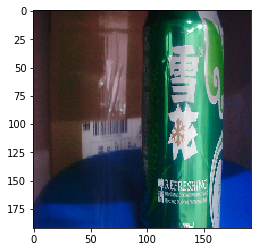

In [7]:
plt.imshow(test_image)

In [8]:
model = keras.models.load_model('cnn.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 192, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0

In [9]:
layer_outputs = [layer.output for layer in model.layers]
layer_models = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
test_image = np.expand_dims(test_image, 0)
layer_outputs = layer_models.predict(test_image)

In [11]:
image_scale = 0.3

## 1: Convolution 2d

size: (3*3), #filters: 16, output: (192, 192, 16)

In [12]:
print("name: {}".format(model.layers[0].name))
print("the number of activations: {}".format(layer_outputs[0].shape[3]))

name: conv2d
the number of activations: 16


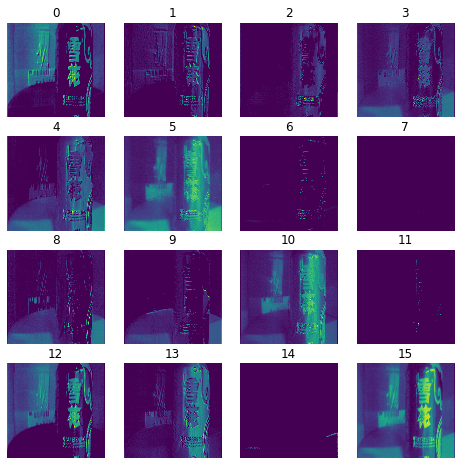

In [13]:
plt.figure(figsize=(8, 8))
for index in range(layer_outputs[0].shape[3]):
    plt.subplot(4, 4, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[0][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer1.jpg')
plt.show()

## 2: Max Pooling 2d

size: (2*2), output: (96, 96, 64)

In [14]:
print("name: {}".format(model.layers[1].name))
print("the number of activations: {}".format(layer_outputs[1].shape[3]))

name: max_pooling2d
the number of activations: 16


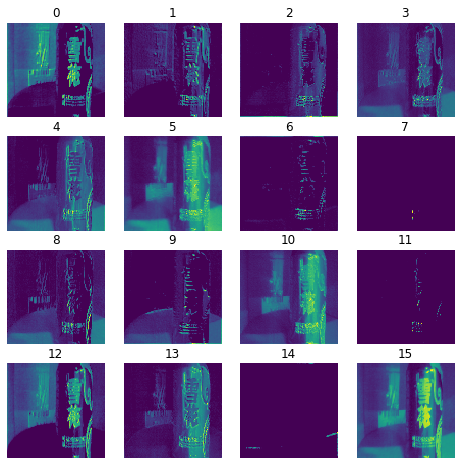

In [15]:
plt.figure(figsize=(8, 8))
for index in range(layer_outputs[1].shape[3]):
    plt.subplot(4, 4, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[1][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer2.jpg')
plt.show()

## 3: Convolution 2d

size: (3*3), #filters: 32, output: (96, 96, 32)

In [16]:
print("name: {}".format(model.layers[2].name))
print("the number of activations: {}".format(layer_outputs[2].shape[3]))

name: conv2d_1
the number of activations: 32


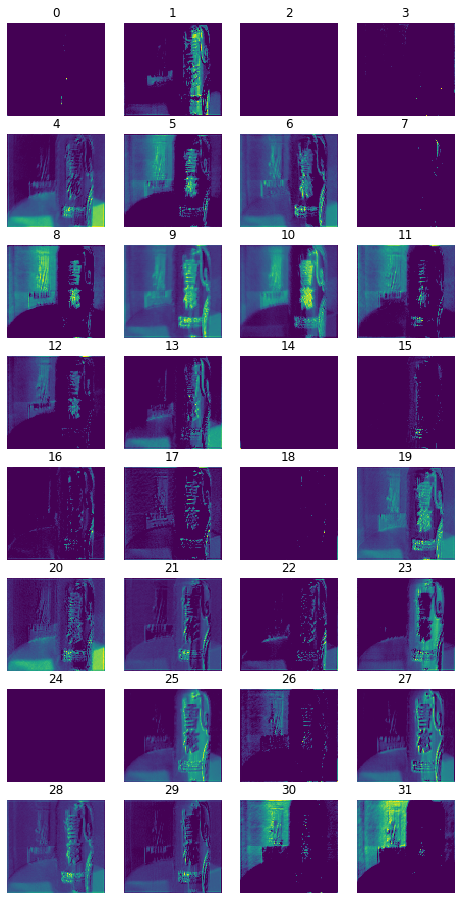

In [17]:
plt.figure(figsize=(8, 16))
for index in range(layer_outputs[2].shape[3]):
    plt.subplot(8, 4, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[2][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer3.jpg')
plt.show()

## 4: Max Pooling 2d

size: (2*2), output: (48, 48, 32)

In [18]:
print("name: {}".format(model.layers[3].name))
print("the number of activations: {}".format(layer_outputs[3].shape[3]))

name: max_pooling2d_1
the number of activations: 32


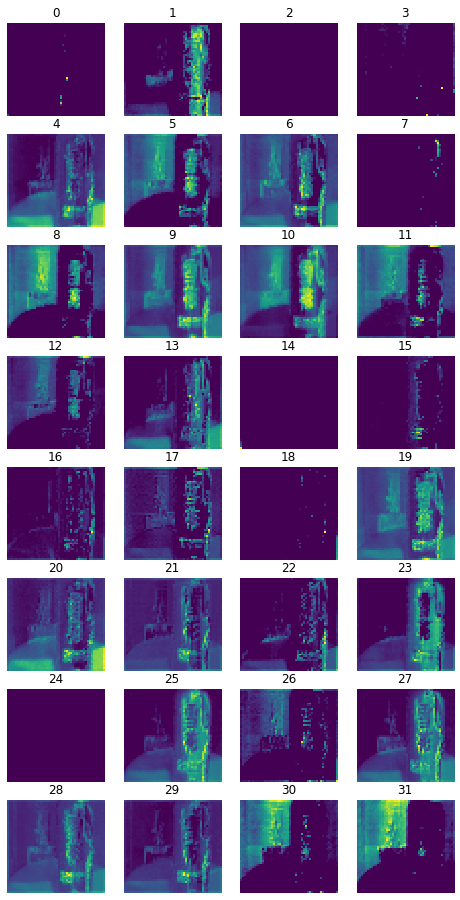

In [19]:
plt.figure(figsize=(8, 16))
for index in range(layer_outputs[3].shape[3]):
    plt.subplot(8, 4, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[3][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer4.jpg')
plt.show()

## 5: Convolution 2d

size: (3*3), #filters: 64, output: (48, 48, 64)

In [20]:
print("name: {}".format(model.layers[4].name))
print("the number of activations: {}".format(layer_outputs[4].shape[3]))

name: conv2d_2
the number of activations: 64


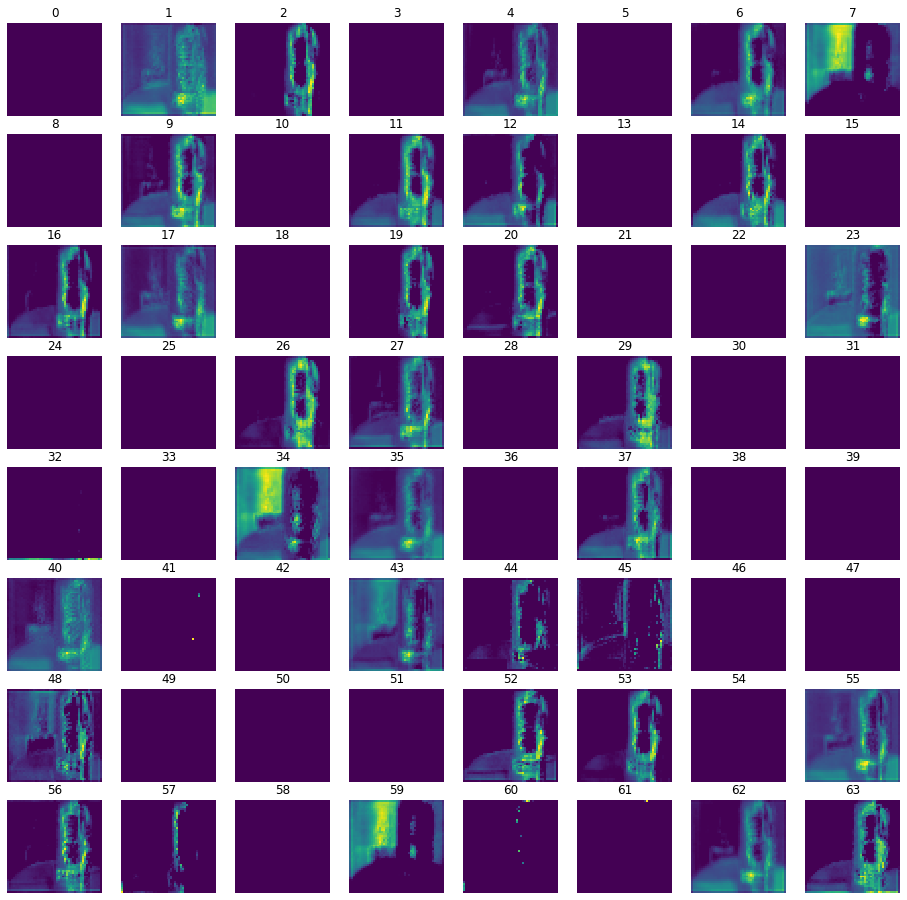

In [21]:
plt.figure(figsize=(16, 16))
for index in range(layer_outputs[4].shape[3]):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[4][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer5.jpg')
plt.show()

## 6: Max Pooling 2d

size: (2*2), output: (24, 24, 64)

In [22]:
print("name: {}".format(model.layers[5].name))
print("the number of activations: {}".format(layer_outputs[5].shape[3]))

name: max_pooling2d_2
the number of activations: 64


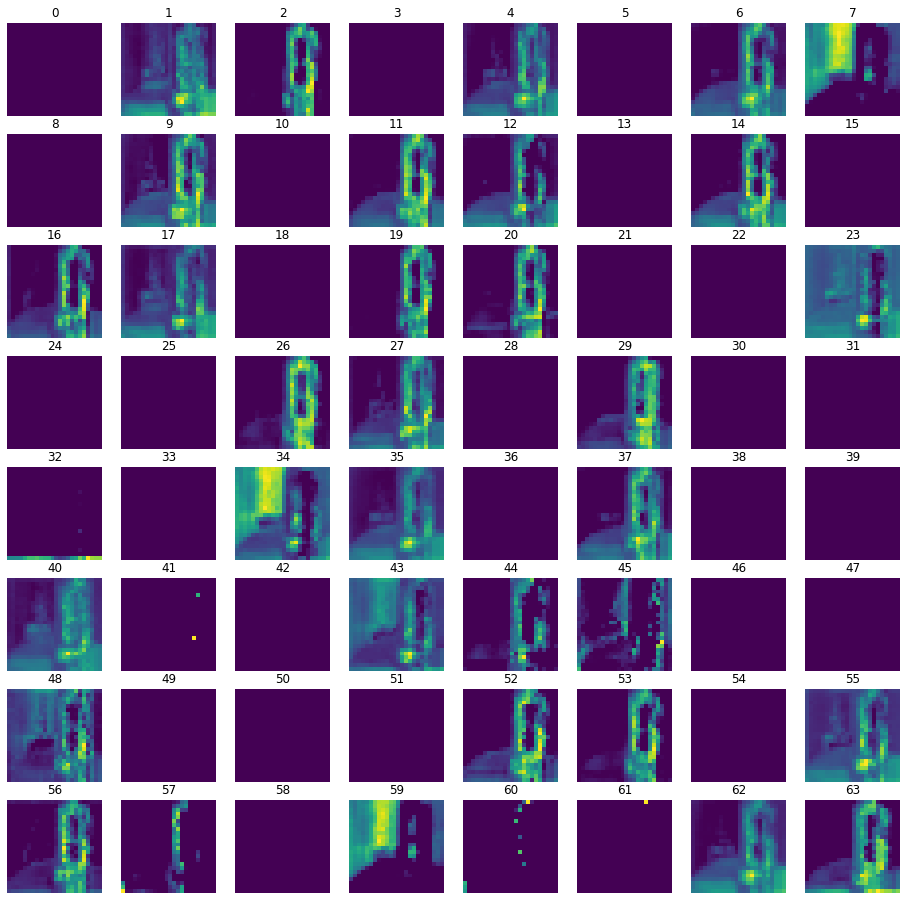

In [23]:
plt.figure(figsize=(16, 16))
for index in range(layer_outputs[5].shape[3]):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.title(index)
    plt.imshow(layer_outputs[5][0, :, :, index], aspect='auto', cmap='viridis')
plt.savefig('README/layer6.jpg')
plt.show()

## The prediction

In [24]:
prediction = model.predict(test_image)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)
print(labels[prediction])

[[3.0382489e-17 1.0122443e-13 1.0000000e+00]]
2
xuehua


In [28]:
output_element = model.output[:, prediction]
print(output_element)

Tensor("strided_slice_2:0", shape=(None,), dtype=float32)


In [32]:
last_conv_layer = model.get_layer('conv2d_2')
with tf.GradientTape() as tape:
    grads = K.gradients(output_element, last_conv_layer.output)[0]
grads

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.